In [1]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [34]:
AllData_df = pd.read_csv("../Data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
AllData_df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,...,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22
0,102001,0,United States,Country,NaN,128193.0,128540.0,128904.0,129647.0,130396.0,...,315164.0,319079.0,323445.0,328180.0,333400.0,338673.0,344230,349265,353446,355852
1,394913,1,"New York, NY",Msa,NY,225281.0,226627.0,227838.0,230222.0,232442.0,...,571576.0,575145.0,578396.0,582369.0,587022.0,593470.0,600621,608159,614185,618517
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,228935.0,229732.0,230953.0,233274.0,235763.0,...,842992.0,850126.0,859335.0,870012.0,882230.0,899552.0,918626,935074,936406,933282
3,394463,3,"Chicago, IL",Msa,IL,170843.0,171246.0,171768.0,172812.0,173918.0,...,287525.0,290233.0,292966.0,295614.0,298193.0,301504.0,304988,308971,311970,313828
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130922.0,131027.0,131114.0,131327.0,131550.0,...,334386.0,339874.0,345774.0,353216.0,361748.0,369869.0,379389,388117,395694,397905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,92315.0,92898.0,94520.0,96173.0,98420.0,99618.0,100672,101760,103304,104979
904,753874,930,"Craig, CO",Msa,CO,95095.0,95441.0,96026.0,96721.0,97438.0,...,243717.0,245335.0,248749.0,251721.0,254099.0,254350.0,254500,255437,259311,263752
905,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,168739.0,169789.0,172586.0,175328.0,177808.0,179610.0,182332,185288,188386,190824
906,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,80013.0,80302.0,82456.0,84690.0,87331.0,88024.0,88679,88968,90141,91552


In [3]:
AllData_df.nunique()

RegionID      908
SizeRank      904
RegionName    908
RegionType      2
StateName      51
             ... 
3/31/22       904
4/30/22       906
5/31/22       906
6/30/22       907
7/31/22       908
Length: 276, dtype: int64

In [4]:
july_df=AllData_df[['RegionID', 'RegionName','StateName', '7/31/20','7/31/21','7/31/22']]
july_df

,RegionID,RegionName,StateName,7/31/20,7/31/21,7/31/22
0,102001,United States,NaN,257067.0,300939.0,355852
1,394913,"New York, NY",NY,489474.0,553452.0,618517
2,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,685733.0,815943.0,933282
3,394463,"Chicago, IL",IL,245313.0,277631.0,313828
4,394514,"Dallas-Fort Worth, TX",TX,263109.0,313134.0,397905
...,...,...,...,...,...,...
903,394767,"Lamesa, TX",TX,79789.0,89095.0,104979
904,753874,"Craig, CO",CO,203485.0,233731.0,263752
905,394968,"Pecos, TX",TX,135280.0,154038.0,190824
906,395188,"Vernon, TX",TX,72824.0,78516.0,91552


In [5]:
july_df=july_df.dropna()
july_df

,RegionID,RegionName,StateName,7/31/20,7/31/21,7/31/22
1,394913,"New York, NY",NY,489474.0,553452.0,618517
2,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,685733.0,815943.0,933282
3,394463,"Chicago, IL",IL,245313.0,277631.0,313828
4,394514,"Dallas-Fort Worth, TX",TX,263109.0,313134.0,397905
5,394974,"Philadelphia, PA",PA,258636.0,301935.0,338231
...,...,...,...,...,...,...
903,394767,"Lamesa, TX",TX,79789.0,89095.0,104979
904,753874,"Craig, CO",CO,203485.0,233731.0,263752
905,394968,"Pecos, TX",TX,135280.0,154038.0,190824
906,395188,"Vernon, TX",TX,72824.0,78516.0,91552


In [6]:
results=july_df.dtypes
results

RegionID        int64
RegionName     object
StateName      object
7/31/20       float64
7/31/21       float64
7/31/22         int64
dtype: object

In [7]:
july_df.nunique()

RegionID      891
RegionName    891
StateName      51
7/31/20       890
7/31/21       889
7/31/22       891
dtype: int64

In [8]:
states=july_df.StateName.value_counts()
states

TX    65
OH    45
GA    37
NC    36
IN    36
PA    34
CA    33
MI    33
FL    28
IL    27
NY    26
TN    26
MO    25
WI    24
AL    21
OK    21
OR    20
MN    20
KS    20
AR    20
IA    19
WA    19
KY    17
CO    17
LA    17
NM    16
MS    16
SC    15
ID    13
NE    12
VA    12
AZ    11
SD    10
WV    10
UT     9
NV     9
WY     9
ND     8
MA     7
MT     7
MD     6
NH     6
CT     5
HI     4
AK     4
NJ     4
VT     4
ME     4
DE     2
RI     1
DC     1
Name: StateName, dtype: int64

<AxesSubplot:ylabel='Density'>

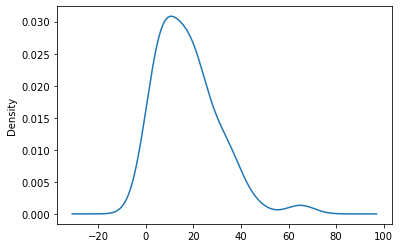

In [9]:
states.plot.density()

In [10]:
states.head(28)

TX    65
OH    45
GA    37
NC    36
IN    36
PA    34
CA    33
MI    33
FL    28
IL    27
NY    26
TN    26
MO    25
WI    24
AL    21
OK    21
OR    20
MN    20
KS    20
AR    20
IA    19
WA    19
KY    17
CO    17
LA    17
NM    16
MS    16
SC    15
Name: StateName, dtype: int64

In [11]:
replace_names = list(states[states < 15].index)

for name in replace_names:
    july_df.StateName = july_df.StateName.replace(name,"Other")
    
# Check to make sure binning was successful
july_df.StateName.value_counts()

/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Other    158
TX        65
OH        45
GA        37
NC        36
IN        36
PA        34
CA        33
MI        33
FL        28
IL        27
TN        26
NY        26
MO        25
WI        24
OK        21
AL        21
OR        20
MN        20
AR        20
KS        20
WA        19
IA        19
CO        17
KY        17
LA        17
NM        16
MS        16
SC        15
Name: StateName, dtype: int64

## Add New listing feature

In [12]:
new_listing_df=pd.read_csv("Metro_new_listings_uc_sfrcondo_sm_month.csv")
new_listing_df=new_listing_df[['RegionID', 'RegionName','StateName', '2020-07-31','2021-07-31','2022-07-31']]
new_listing_df=new_listing_df.dropna()
new_listing_df=new_listing_df.drop(columns=['StateName','RegionName'])
new_listing_df

,RegionID,2020-07-31,2021-07-31,2022-07-31
1,394913,22506.0,21367.0,16150.0
2,753899,9795.0,11114.0,9320.0
3,394463,15425.0,17589.0,13447.0
4,394514,11882.0,12084.0,11154.0
5,394974,8739.0,9811.0,7852.0
...,...,...,...,...
898,395112,71.0,42.0,51.0
899,753925,62.0,45.0,32.0
900,753927,20.0,23.0,20.0
902,394330,25.0,25.0,20.0


## Merge

In [13]:
july_df=july_df.merge(new_listing_df,on='RegionID')
july_df

,RegionID,RegionName,StateName,7/31/20,7/31/21,7/31/22,2020-07-31,2021-07-31,2022-07-31
0,394913,"New York, NY",NY,489474.0,553452.0,618517,22506.0,21367.0,16150.0
1,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,685733.0,815943.0,933282,9795.0,11114.0,9320.0
2,394463,"Chicago, IL",IL,245313.0,277631.0,313828,15425.0,17589.0,13447.0
3,394514,"Dallas-Fort Worth, TX",TX,263109.0,313134.0,397905,11882.0,12084.0,11154.0
4,394974,"Philadelphia, PA",PA,258636.0,301935.0,338231,8739.0,9811.0,7852.0
...,...,...,...,...,...,...,...,...,...
852,395111,"Spencer, IA",IA,132148.0,141012.0,149597,31.0,27.0,24.0
853,753925,"Vineyard Haven, MA",Other,860818.0,991822.0,1110770,62.0,45.0,32.0
854,753927,"Winnemucca, NV",Other,247928.0,271344.0,313137,20.0,23.0,20.0
855,394330,"Andrews, TX",TX,178496.0,198724.0,223659,25.0,25.0,20.0


In [14]:
july_df=july_df.drop(columns='RegionID')
july_df

,RegionName,StateName,7/31/20,7/31/21,7/31/22,2020-07-31,2021-07-31,2022-07-31
0,"New York, NY",NY,489474.0,553452.0,618517,22506.0,21367.0,16150.0
1,"Los Angeles-Long Beach-Anaheim, CA",CA,685733.0,815943.0,933282,9795.0,11114.0,9320.0
2,"Chicago, IL",IL,245313.0,277631.0,313828,15425.0,17589.0,13447.0
3,"Dallas-Fort Worth, TX",TX,263109.0,313134.0,397905,11882.0,12084.0,11154.0
4,"Philadelphia, PA",PA,258636.0,301935.0,338231,8739.0,9811.0,7852.0
...,...,...,...,...,...,...,...,...
852,"Spencer, IA",IA,132148.0,141012.0,149597,31.0,27.0,24.0
853,"Vineyard Haven, MA",Other,860818.0,991822.0,1110770,62.0,45.0,32.0
854,"Winnemucca, NV",Other,247928.0,271344.0,313137,20.0,23.0,20.0
855,"Andrews, TX",TX,178496.0,198724.0,223659,25.0,25.0,20.0


In [15]:
RegionName_df=july_df[['RegionName']]
RegionName_df

,RegionName
0,"New York, NY"
1,"Los Angeles-Long Beach-Anaheim, CA"
2,"Chicago, IL"
3,"Dallas-Fort Worth, TX"
4,"Philadelphia, PA"
...,...
852,"Spencer, IA"
853,"Vineyard Haven, MA"
854,"Winnemucca, NV"
855,"Andrews, TX"


## Encoder

In [16]:
july_df=july_df.drop(columns='RegionName')

In [17]:
july_cat = july_df.dtypes[july_df.dtypes == "object"].index.tolist()
july_df[july_cat].nunique()

StateName    29
dtype: int64

In [18]:
july_cat

['StateName']

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(july_df[july_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(july_cat)
encode_df

/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,StateName_AL,StateName_AR,StateName_CA,StateName_CO,StateName_FL,StateName_GA,StateName_IA,StateName_IL,StateName_IN,StateName_KS,...,StateName_OH,StateName_OK,StateName_OR,StateName_Other,StateName_PA,StateName_SC,StateName_TN,StateName_TX,StateName_WA,StateName_WI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
merge_df = july_df.merge(encode_df,left_index=True, right_index=True)
merge_df = merge_df.drop(july_cat,1)
merge_df

/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,7/31/20,7/31/21,7/31/22,2020-07-31,2021-07-31,2022-07-31,StateName_AL,StateName_AR,StateName_CA,StateName_CO,...,StateName_OH,StateName_OK,StateName_OR,StateName_Other,StateName_PA,StateName_SC,StateName_TN,StateName_TX,StateName_WA,StateName_WI
0,489474.0,553452.0,618517,22506.0,21367.0,16150.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,685733.0,815943.0,933282,9795.0,11114.0,9320.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,245313.0,277631.0,313828,15425.0,17589.0,13447.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,263109.0,313134.0,397905,11882.0,12084.0,11154.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,258636.0,301935.0,338231,8739.0,9811.0,7852.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,132148.0,141012.0,149597,31.0,27.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
853,860818.0,991822.0,1110770,62.0,45.0,32.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
854,247928.0,271344.0,313137,20.0,23.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
855,178496.0,198724.0,223659,25.0,25.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Change the column name

In [21]:
#.....the new listing number of 2020-07-31


In [22]:
# Split our preprocessed data into our features and target arrays
y = merge_df["7/31/22"].values
X = merge_df.drop(["7/31/22"],1).values

/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [24]:
# # Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
y_train = y_train.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)

In [27]:
len(X_train[0])

34

## Compile, Train and Evaluate the Model

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 2*len(X_train[0])
# hidden_nodes_layer2 = len(X_train[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                2380      
                                                                 
 dense_1 (Dense)             (None, 1)                 69        
                                                                 
Total params: 2,449
Trainable params: 2,449
Non-trainable params: 0
_________________________________________________________________


2022-08-16 16:51:24.425074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
21/21 [==============================] - 0s 1ms/step - loss: -288085.9688 - accuracy: 0.0000e+00
Epoch 2/30
21/21 [==============================] - 0s 1ms/step - loss: -569763.1875 - accuracy: 0.0000e+00
Epoch 3/30
21/21 [==============================] - 0s 1ms/step - loss: -880981.6250 - accuracy: 0.0000e+00
Epoch 4/30
21/21 [==============================] - 0s 1ms/step - loss: -1235481.0000 - accuracy: 0.0000e+00
Epoch 5/30
21/21 [==============================] - 0s 1ms/step - loss: -1647040.7500 - accuracy: 0.0000e+00
Epoch 6/30
21/21 [==============================] - 0s 1ms/step - loss: -2152205.5000 - accuracy: 0.0000e+00
Epoch 7/30
21/21 [==============================] - 0s 1ms/step - loss: -2731604.2500 - accuracy: 0.0000e+00
Epoch 8/30
21/21 [==============================] - 0s 1ms/step - loss: -3423398.7500 - accuracy: 0.0000e+00
Epoch 9/30
21/21 [==============================] - 0s 1ms/step - loss: -4189093.0000 - accuracy: 0.0000e+00
Epoch 10/30
21/21 [===

## Random Forest

In [32]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


 Random forest predictive accuracy: 0.000


In [33]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'xgboost'